## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Чтение данных

In [2]:
raw_data = pd.read_csv('data/medical_cases.csv')
raw_data

,description,transcription,sample_name,medical_specialty,keywords
0,Patient having severe sinusitis about two to t...,"HISTORY:, I had the pleasure of meeting and e...",Chronic Sinusitis,Allergy / Immunology,NaN
1,A female for a complete physical and follow up...,"SUBJECTIVE: , This is a 42-year-old white fema...",Followup on Asthma,Allergy / Immunology,NaN
2,Mother states he has been wheezing and coughing.,"CHIEF COMPLAINT: , This 5-year-old male presen...",Asthma in a 5-year-old,Allergy / Immunology,NaN
3,"Acute allergic reaction, etiology uncertain, h...","HISTORY: , A 34-year-old male presents today s...",Allergy Evaluation Consult,Allergy / Immunology,NaN
4,"The patient died of a pulmonary embolism, the ...","SUMMARY OF CLINICAL HISTORY:, The patient was...",Autopsy - 8,Autopsy,NaN
...,...,...,...,...,...
4309,"Patient with a diagnosis of pancreatitis, deve...","HISTORY:, The patient was in the intensive ca...",Nephrology Consultation - 3,Consult - History and Phy.,"consult - history and phy., intubated, consult..."
4310,The patient with recurrent nongranulomatous an...,"PAST MEDICAL HISTORY: , Significant for GERD, ...",Uveitis,Consult - History and Phy.,"consult - history and phy., iritis, nongranulo..."
4311,Consultation because of irregular periods and ...,She started her periods at age 13. She is com...,OB/GYN Consultation - 3,Consult - History and Phy.,"consult - history and phy., irregular periods,..."
4312,Pneumatosis coli in the cecum. Possible ische...,"REASON FOR CONSULTATION: , Pneumatosis coli in...",Ischemic Cecum - Consult,Consult - History and Phy.,"consult - history and phy., ischemic cecum, me..."


Посчет слов и предложений

In [3]:
from src.data_cleaning import count_sentences, count_words


medical_transcriptions = raw_data[raw_data['transcription'].notna()]

sent_cnt = count_sentences(medical_transcriptions.values.tolist())
word_count = count_words(medical_transcriptions.values.tolist())

print(
    'Number of sentences in transcriptions column: %d' % sent_cnt,
    'Number of unique words in transcriptions column: %d' % word_count,
    sep='\n',
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Arina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of sentences in transcriptions column: 163198
Number of unique words in transcriptions column: 35400


Просмотр категорий

In [4]:
data_categories = medical_transcriptions.groupby(medical_transcriptions['medical_specialty'])

print('Original Categories:')
for i, k in enumerate(data_categories):
    c_name, c_data = k
    print('Category %d: %s %d' % (i, c_name, len(c_data)))

Original Categories:
Category 0: Allergy / Immunology 14
Category 1: Autopsy 16
Category 2: Cardiovascular / Pulmonary 742
Category 3: Consult - History and Phy. 915
Category 4: Cosmetic / Plastic Surgery 29
Category 5: Dentistry 30
Category 6: Dermatology 34
Category 7: Diets and Nutritions 10
Category 8: ENT - Otolaryngology 80
Category 9: Emergency Room Reports 121
Category 10: Endocrinology 23
Category 11: Gastroenterology 222
Category 12: General Medicine 347
Category 13: Hematology - Oncology 120
Category 14: Hospice - Palliative Care 7
Category 15: Lab Medicine - Pathology 8
Category 16: Nephrology 71
Category 17: Neurology 282
Category 18: Neurosurgery 109
Category 19: Obstetrics / Gynecology 182
Category 20: Office Notes 60
Category 21: Ophthalmology 66
Category 22: Orthopedic 408
Category 23: Pediatrics - Neonatal 64
Category 24: Physical Medicine - Rehab 20
Category 25: Podiatry 10
Category 26: Psychiatry / Psychology 68
Category 27: Radiology 50
Category 28: Rheumatology 6


## Чистка данных

Удаление редких категорий

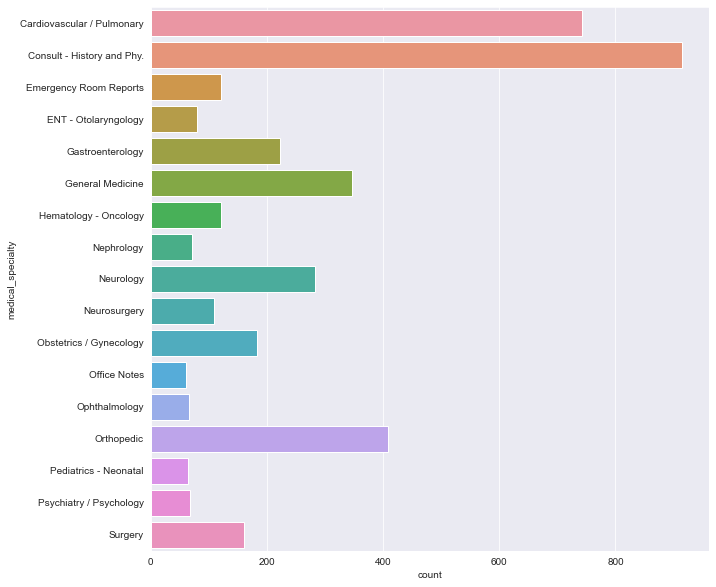

In [5]:
data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = data_categories.groupby(data_categories['medical_specialty'])

plt.figure(figsize=(10, 10))
sns.countplot(y='medical_specialty', data=data_categories)
plt.show()

Удаление ненужных данных

In [18]:
data = data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data

,transcription,medical_specialty
12,"REASON FOR CONSULTATION:, Ventricular ectopy ...",Cardiovascular / Pulmonary
13,"CHIEF COMPLAINT:, ""Trouble breathing."",HISTORY...",Cardiovascular / Pulmonary
14,"EXAM: , Transesophageal echocardiogram and dir...",Cardiovascular / Pulmonary
15,"HISTORY: ,I had the pleasure of meeting and e...",Cardiovascular / Pulmonary
16,"On review of systems, the patient admits to hy...",Cardiovascular / Pulmonary
...,...,...
4309,"HISTORY:, The patient was in the intensive ca...",Consult - History and Phy.
4310,"PAST MEDICAL HISTORY: , Significant for GERD, ...",Consult - History and Phy.
4311,She started her periods at age 13. She is com...,Consult - History and Phy.
4312,"REASON FOR CONSULTATION: , Pneumatosis coli in...",Consult - History and Phy.


Просмотр транскрипций для обнаружения ненужных элементов

In [19]:
print(
    'Transcription 1: ' + data.iloc[5]['transcription'],
    'Transcription 2: ' + data.iloc[125]['transcription'],
    sep='\n')

Transcription 1: PROTOCOL:,  Bruce.,PERTINENT MEDICATION: , None.,REASON FOR TEST:,  Chest pain.,PROCEDURE AND INTERPRETATION: ,1.  Baseline heart rate:  67.,2.  Baseline blood pressure:  150/86.,3.  Total time:  6 minute 51 seconds.,4.  METs:  10.1.,5.  Peak heart rate:  140.,6.  Percent of maximum-predicted heart rate:  90.,7.  Peak blood pressure:  200/92.,8.  Reason test terminated:  Shortness of breath and fatigue.,9.  Estimated aerobic capacity:  Average.,10. Heart rate response:  Normal.,11. Blood pressure response:  Hypertensive.,12. ST segment response:  Normal.,13. Chest pain:  None.,14. Symptoms:  None.,15. Arrhythmia:  None.,CONCLUSION:,1.  Average aerobic capacity.,2.  Normal heart rate and blood pressure response to exercise.,3.  No symptomatic electrocardiographic evidence of ischemia.,CONDITION: , Stable with normal vital signs.,DISPOSITION:  ,The patient was discharged home and was asymptomatic.,
Transcription 2: IDENTIFYING DATA:,  This is a 40-year-old male seen toda

Удаление ненужных символов

In [20]:
from src.data_cleaning import tokenize_text
from src.data_cleaning import clean_text

data['transcription']  = data['transcription'].apply(clean_text)
#data['transcription'] = data['transcription'].apply(tokenize_text)
'''''
words = set()
for transcription in transcriptions.iloc:
    words.update(transcription.split(' '))

print(len(words), sorted(list(words)))
'''''


"''\nwords = set()\nfor transcription in transcriptions.iloc:\n    words.update(transcription.split(' '))\n\nprint(len(words), sorted(list(words)))\n"

In [21]:
data

,transcription,medical_specialty
12,ventricular ectopi coronari arteri diseas see ...,Cardiovascular / Pulmonary
13,troubl breath old german woman brought shock r...,Cardiovascular / Pulmonary
14,transesophag echocardiogram direct current car...,Cardiovascular / Pulmonary
15,histori pleasur meet evalu patient refer evalu...,Cardiovascular / Pulmonary
16,review system patient admit hypertens occasion...,Cardiovascular / Pulmonary
...,...,...
4309,histori patient intens care unit set intub sed...,Consult - History and Phy.
4310,past medic histori signific gerd histori iron ...,Consult - History and Phy.
4311,start period age complain three month histori ...,Consult - History and Phy.
4312,pneumatosi coli cecum patient old gentleman ad...,Consult - History and Phy.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=950)
tfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist())
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['abdomen', 'abdomen soft', 'abdomen soft nontend', 'abdomin', 'abdomin pain', 'abl', 'abnorm', 'abov', 'abus', 'achiev', 'activ', 'actual', 'acut', 'acut distress', 'addit', 'adenopathi', 'adequ', 'adhes', 'administ', 'admiss', 'admit', 'advanc', 'affect', 'age', 'ago', 'air', 'alcohol', 'alert', 'alert orient', 'allerg', 'allergi', 'allergi known', 'allergi known drug', 'allow', 'altern', 'anemia', 'anesthesia', 'anesthesia gener', 'anesthet', 'angiogram', 'ani', 'ankl', 'answer', 'anterior', 'anterior descend', 'antibiot', 'anxieti', 'aorta', 'aortic', 'appar', 'appear', 'appli', 'appreci', 'appropri', 'approxim', 'area', 'arm', 'arteri', 'arteri diseas', 'arthriti', 'ask', 'aspect', 'aspir', 'aspirin', 'ass', 'assist', 'associ', 'atraumat', 'atrial', 'atrial fibril', 'attempt', 'attent', 'auscult', 'awak', 'away', 'axi', 'balloon', 'base', 'becaus', 'bed', 'befor', 'began', 'benefit', 'benign', 'better', 'bilater', 'biopsi', 'bipolar', 'bladder', 'blade', 'bleed', 'block', 'blood',

C:\Users\Arina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


C:\Users\Arina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Arina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Arina\AppData\Local\Temp/ipykernel_16140/235732839.py:9: UserWarning: The palette list has more values (21) than needed (17), which may not be intended.
  sns.scatterplot(


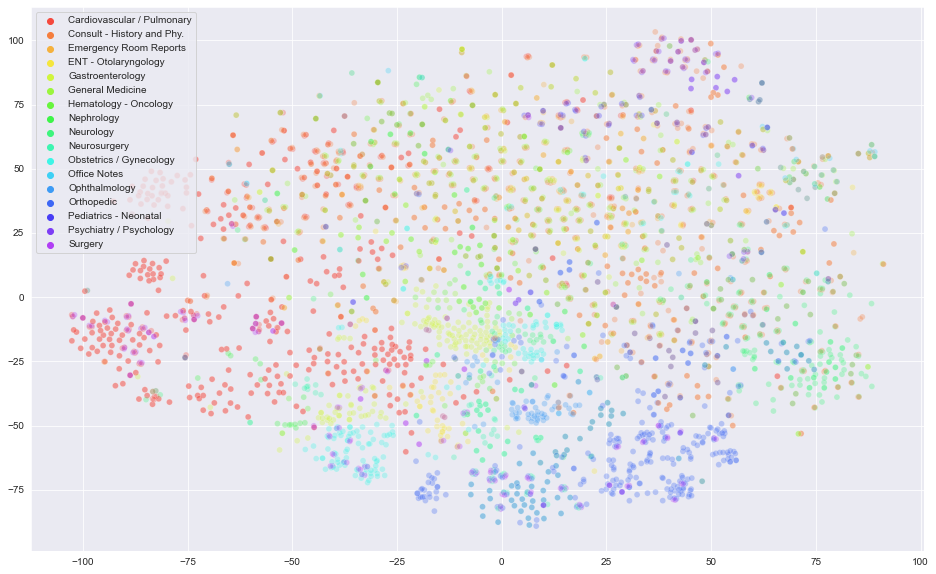

In [23]:
import gc
from sklearn.manifold import TSNE
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
labels = data['medical_specialty'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(16,10))
palette = sns.hls_palette(21, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)

In [25]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(3012, 548)
Test_Set_Size:(1005, 548)


In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels = category_list)

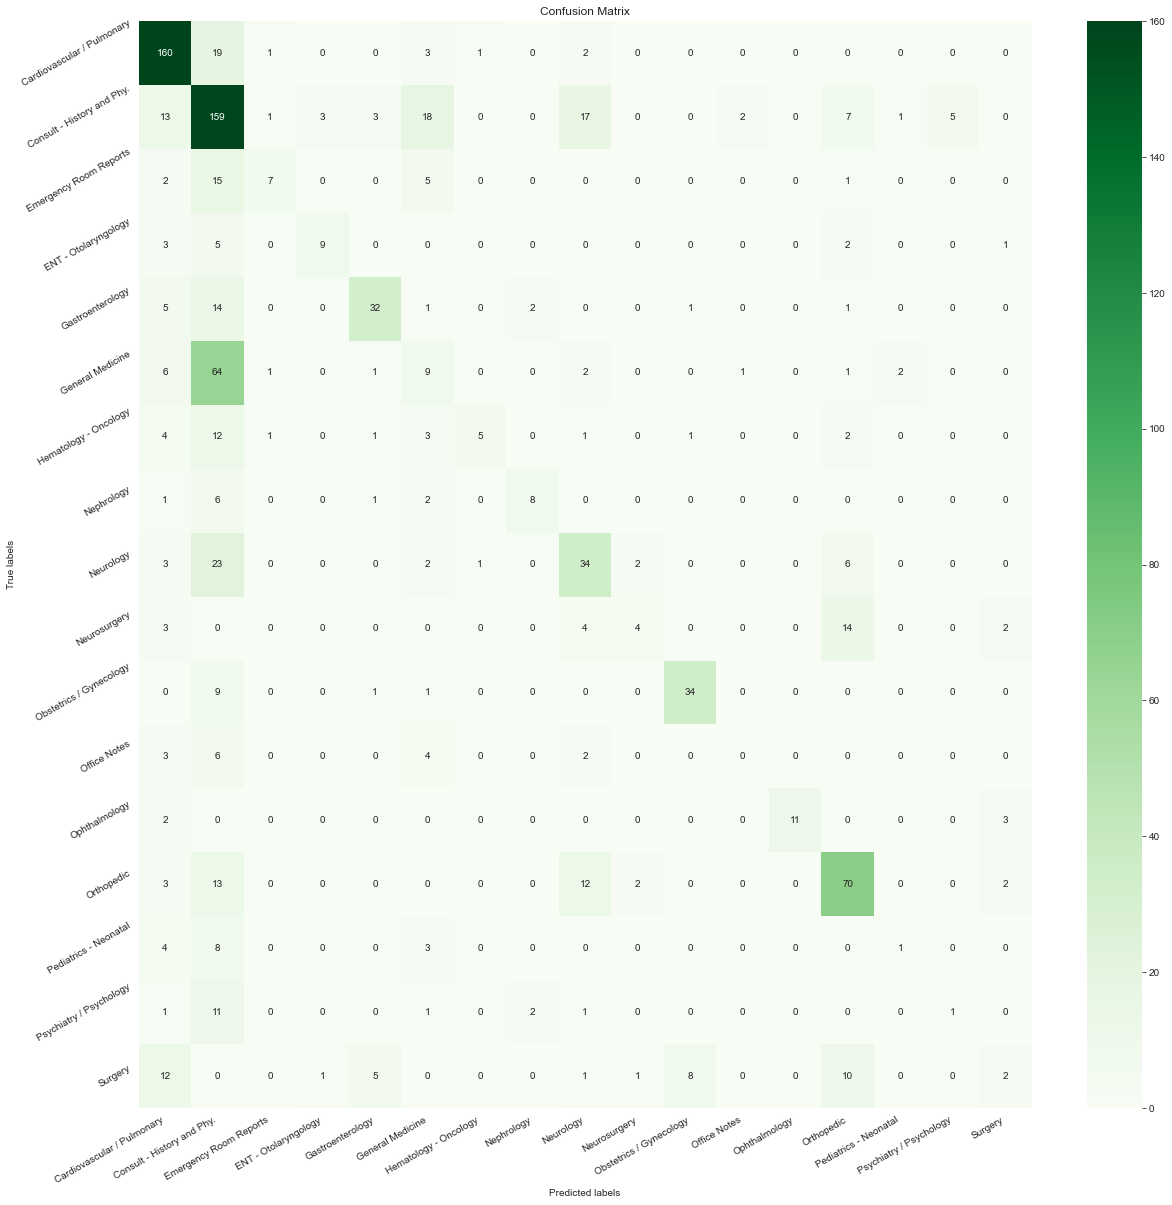

In [28]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred,labels=category_list))

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.71      0.86      0.78       186
Consult - History and Phy.       0.44      0.69      0.54       229
    Emergency Room Reports       0.64      0.23      0.34        30
      ENT - Otolaryngology       0.69      0.45      0.55        20
          Gastroenterology       0.73      0.57      0.64        56
          General Medicine       0.17      0.10      0.13        87
     Hematology - Oncology       0.71      0.17      0.27        30
                Nephrology       0.67      0.44      0.53        18
                 Neurology       0.45      0.48      0.46        71
              Neurosurgery       0.44      0.15      0.22        27
   Obstetrics / Gynecology       0.77      0.76      0.76        45
              Office Notes       0.00      0.00      0.00        15
             Ophthalmology       1.00      0.69      0.81        16
                Orthopedic       0.61      0.69